# Imports

In [217]:
#workhorses
import numpy as np
import pandas as pd

#for custom colormaps
from matplotlib.colors import LinearSegmentedColormap

In [218]:
#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler


#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

## get data

In [219]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20190214 A=B mar cfp yfp small screen 1/'

filename = '20190214 A=B mar 1.xlsx'

In [220]:
dd = pd.read_excel(directory + filename, sheet_name=None)

In [221]:
dd.keys()

odict_keys(['OD700_raw', 'CFP_raw', 'YFP_raw', 'OD700', 'CFP', 'YFP', 'OD700_tidy', 'CFP_tidy', 'YFP_tidy', 'dense_norm_cumsum_tidy', 'IDs', 'Exp'])

In [222]:
sheets_to_plot = [x for x in dd.keys() if '_tidy' in x]

In [223]:
sheets_to_plot

['OD700_tidy', 'CFP_tidy', 'YFP_tidy', 'dense_norm_cumsum_tidy']

## make relevant indices

In [224]:
#which data are we plotting
data = sheets_to_plot[0]

In [225]:
#get the control ones
ctrl = dd[data]['a'] == 'ctrl'

#get the media blank ones
med = dd[data]['a'] == 'lb'

#get the ones without a and b cells
no_a = dd[data]['a'] == 'x'
no_b = dd[data]['b'] == 'x'

#get the ones in the first growth cycle
first = dd[data]['dil'] == 0

#now all the mixes should be accessible by asking for 
#NOT the no a and b indices and NOT the ctrl and med indices

mix = ~no_a & ~no_b & ~ctrl & ~med

# *Time course data plots*

# Generate a facetgrid for all the wells showing just OD

## access and format the data

In [213]:
df = dd[data].loc[mix]

#having an issue where fluor values are being read as "object" rather than numbers
df.loc[:,'value'] = df.loc[:, 'value'].astype(float)

In [214]:
all_sal_conc = np.unique(df['sal'])
all_iptg_conc = np.unique(df['iptg'])

all_ind_pairs = [str(i) + ', ' + str(s) for i, s in zip(all_iptg_conc, all_sal_conc)]

In [215]:
###get relevant info for color mapping

#what are the unique inducer conditions you want to make diff colors
ind_concs = np.unique(df['iptg'])
ind_labels = all_ind_pairs

#create a list of values from x-1 of same length as unique inducer concs
#this gets fed to the cmap to get rgb colors
mapping_list = np.linspace(0.37,1,len(ind_concs))

###get some colors that cover all the inducer conditions

#select your color map
cmap = mpl.cm.get_cmap('PuRd')

#create a list of rgb tuples
clist = [cmap(x) for x in mapping_list]

#create the palette dictionary for the facegrit function
pal = {conc : color for conc,color in zip(ind_concs, clist)}

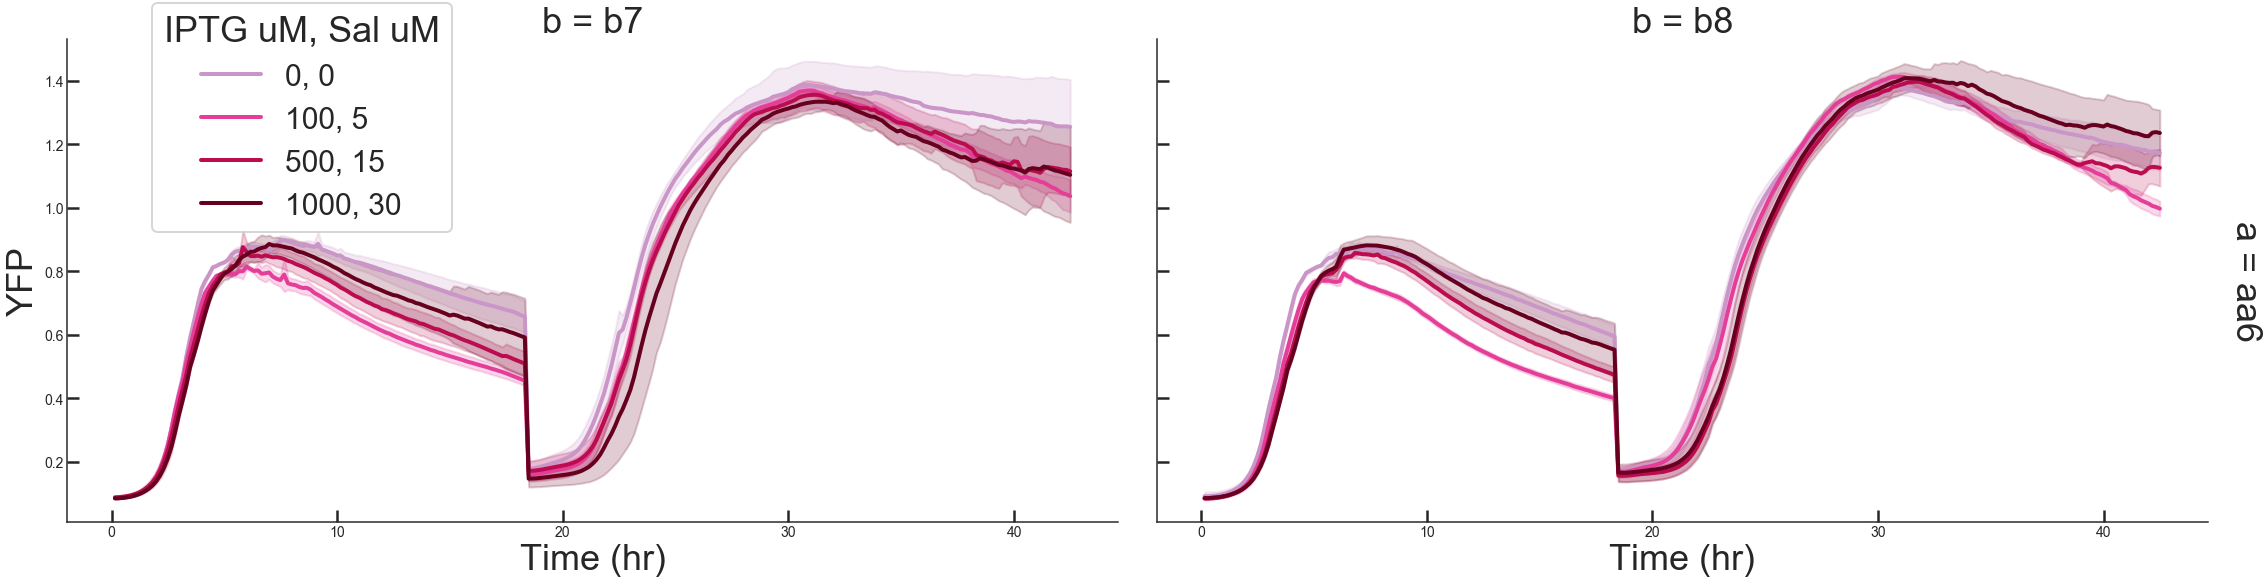

In [216]:
g = sns.FacetGrid(df, col='b', row='a', hue='iptg', palette=pal,
                  height=9, aspect=1.8, margin_titles=True, legend_out=False)


g.map(sns.lineplot, "Time", "value", ci='sd', linewidth=4)

g.fig.legend(labels=ind_labels, title='IPTG uM, Sal uM', fontsize='small', loc='upper right', bbox_to_anchor=(0.2, 0.92))

g.set_titles("{col_name}")
g.set_axis_labels('Time (hr)', "YFP")

In [114]:
#g.savefig(directory + 'allABcombos_grad_od2.pdf')

# *CFP/YFP space*

### access just the data you'll use here

In [568]:
###have to redo slicing since the arrangement of data in this frame could be different
data = 'dense_norm_cumsum_tidy'

##get the data
d=dd[data]

##get the indices

#get the control ones
ctrl = dd[data]['a'] == 'ctrl'

#get the media blank ones
med = dd[data]['a'] == 'lb'

#get the ones without a and b cells
no_a = dd[data]['a'] == 'x'
no_b = dd[data]['b'] == 'x'

#get the ones in the first growth cycle
first = dd[data]['dil'] == 0

#now all the mixes should be accessible by asking for 
#NOT the no a and b indices and NOT the ctrl and med indices

mix = ~no_a & ~no_b & ~ctrl & ~med

In [569]:
###get relevant info for color mapping

#what are the unique inducer conditions you want to make diff colors
ind_concs = np.unique(d['iptg'])
ind_labels = all_ind_pairs

#create a list of values from x-1 of same length as unique inducer concs
#this gets fed to the cmap to get rgb colors
mapping_list = np.linspace(0.4,1,len(ind_concs))

###get some colors that cover all the inducer conditions

#select your color map
cmap = mpl.cm.get_cmap('BuGn')

#create a list of rgb tuples
clist = [cmap(x) for x in mapping_list]

#create the palette dictionary for the facegrit function
pal = {conc : color for conc,color in zip(ind_concs, clist)}

## make the plot

In [570]:
def bin_scatter_sd (x, y, **kwargs):
    """
    from more or less continuous data in 2d fluorescence space, plot a binned scatterplot with sd confidence intervals
    """
    #set the plotting to go to the current axis
    #this is a requirement for using function in mapping to facetgrid
    ax = plt.gca()
    
    #remove the data from the kwargs (where facetgrid puts the data)
    #and store it in this variable
    data = kwargs.pop("data")
    
    #also pop out the color entry from kwargs (it gets this from palette you set in facetgrid)
    color = kwargs.pop("color")
    
    #also get the legend labels
    label = kwargs.pop("label")
    
    #do a regplot without the fit (so a scatter)
    sns.regplot(x=x, y=y, data=data, fit_reg=False,
                #bin the data on the x axis to allow computation of confidence intervals on the 4 replicate traces
                x_bins=100, x_ci='sd',
                #adjust colors, size and alpha of scatter points, other aesthetics
                color=color, scatter_kws={"s": 35, 'alpha' : kwargs['alpha']},
                #matplotlib object stuff
                ax=ax, label=label)
    
    #adjust the alpha of the confidence interval lines, since those are the only line objects on the plot
    plt.setp(ax.get_lines(), alpha=kwargs['alpha']);

In [571]:
df = d.loc[mix]

In [572]:
g = sns.FacetGrid(df, col="a", row ="b", hue='iptg', palette=pal,
                  height=8, aspect=1.3, margin_titles=True, legend_out=True)


g.map_dataframe(bin_scatter_sd, "cfp_norm_sum", "yfp_norm_sum", **{'alpha' : 0.5})


######################### adding reference curves

#plot the a only data on the axes
for axis in g.fig.get_axes():
    #set the current axis to one of the figure axes
    plt.sca(axis)
    
    #create kwargs to match bin_scatter_sd syntax
    ref_data_a = d.loc[no_b]
    color = mpl.colors.to_rgba('blue')
    kwargs = {'color' : color, 'data' : ref_data_a, 'label' : 'A only', 'alpha' : 0.15}
    
    #plot
    bin_scatter_sd("cfp_norm_sum", "yfp_norm_sum", **kwargs)
    
    
for axis, b_type in zip(g.fig.get_axes(), np.unique(d.loc[no_a, 'b'])):
    #set the current axis to one of the figure axes
    plt.sca(axis)
    
    #create kwargs to match bin_scatter_sd syntax
    i = no_a & (d['b'] == b_type)
    ref_data_a = d.loc[i]
    color = mpl.colors.to_rgba('goldenrod')
    kwargs = {'color' : color, 'data' : ref_data_a, 'label' : 'B only', 'alpha' : 0.15}
    
    #plot
    bin_scatter_sd("cfp_norm_sum", "yfp_norm_sum", **kwargs)
    

########## aesthetics
g.set_axis_labels("CFP cumulative", "YFP cumulative")
    
plt.close()




In [573]:
#get one of the axes on which the data is drawn
ax = g.fig.get_axes()[0]

#get the handles (objects assigned labels) and the labels of those handles
handles, labels = ax.get_legend_handles_labels()

#replace the labels with the ones you made earlier
(g.fig.legend(handles, all_ind_pairs + labels[-2:], fontsize='xx-small', bbox_to_anchor=(0.92, 0.92))
 .set_title("IPTG uM, Sal uM", prop = {'size':'x-small'}))

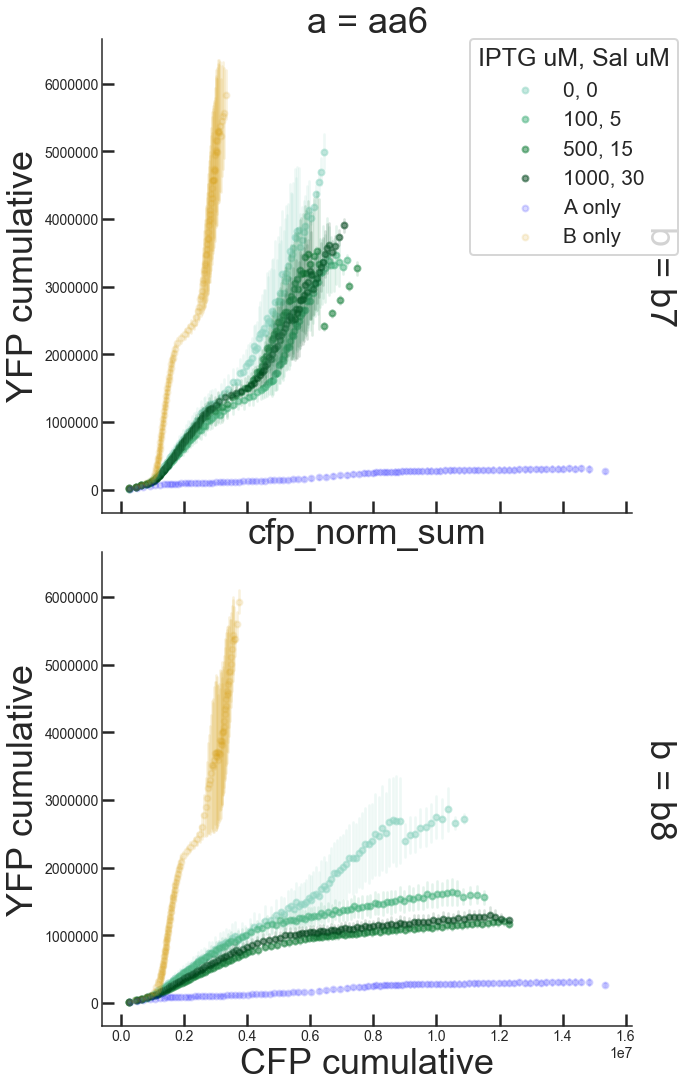

In [574]:
g.fig

In [576]:
g.savefig(directory + 'both_fluor_scatter_full_refs.pdf')